In [1]:
import os, sys, json, yaml
import torch
import seaborn as sn


import torchvision

from omegaconf import OmegaConf
from logger.logger import Logger
from trainer.trainer import Trainer
from utils.util import *
from utils.sam import SAM

from model.modelloader import load_checkpoint
from predict_n_visualizer.predict_n_visualizer import PredictAndVisualizer


cwd = os.getcwd()

# Load config
config_file = 'config/config.yml'
all_config = OmegaConf.load((os.path.join(cwd, config_file)))['config']
seeding(all_config)

# Predict

In [2]:
Model = PredictAndVisualizer(all_config, 'model_PVT_V2')

----- LOADING PRETRAINED CHECKPOINTS -----
1 :     pvt_v2_b0_auto_aug
2 :     pvt_v2_b2_li_2blocks
3 :     pvt_v2_b2_li_aug_base_best
4 :     pvt_v2_b2_li_aug_torchio_best
5 :     pvt_v2_b2_li_auto_aug_best
6 :     pvt_v2_b2_li_sam_adam_torchio
7 :     pvt_v2_b2_li_sgd
Choose one of these checkpoints above: pvt_v2_b2_li_aug_base_best
Checkpoint dist contains:  dict_keys(['epoch', 'state_dict', 'optimizer', 'scheduler', 'loss'])


In [12]:
confusion_matrix = Model.predict()

Data collected! C:/Users/ASUS/COVID_19/data/test_split.txt
------------------------------
OVERALL Accuracy:     0.9284009546539379
OVERALL Sensivity:    [0.9238095  0.93       0.92990655]
OVERALL PosPredValue: [0.8981481  0.86915886 0.9754902 ]
Macro_avg F1-score:   0.9205006758371989
------------------------------


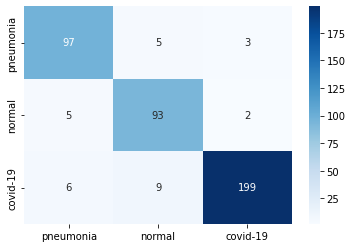

In [13]:
Model.plot_confusion_matrix(confusion_matrix.numpy())

# Visualize

Data collected! C:/Users/ASUS/COVID_19/data/test_split.txt


C:\Users\ASUS\COVID_19\predict_n_visualizer\predict_n_visualizer.py:147: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  percent_pred = F.softmax(output).cpu()


<Figure size 8640x8640 with 0 Axes>

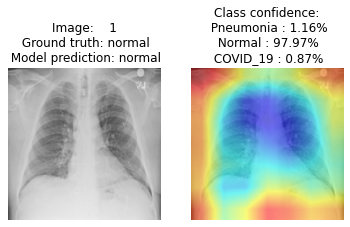

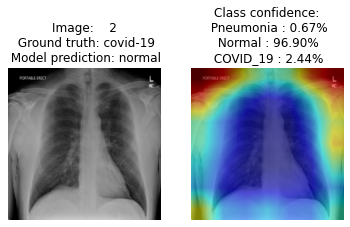

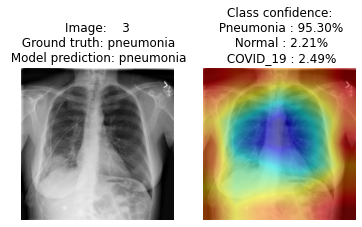

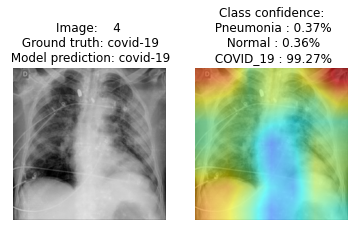

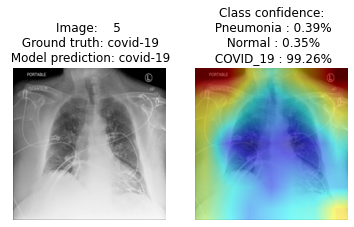

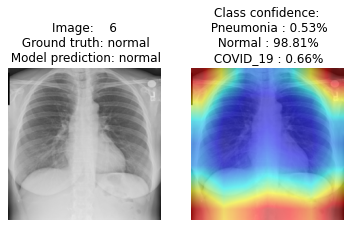

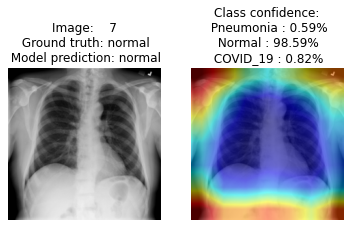

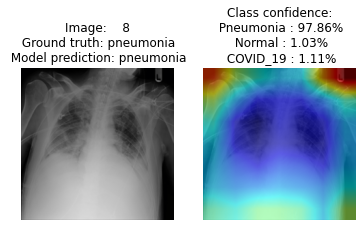

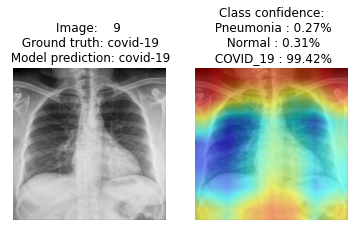

In [3]:
Model.visualize()

# Inference

Feed me the existed image_path: VUNO Med®-Chest X-Ray™ (CE ver.).jpg
Model prediction: covid-19
Class confidence:
             Pneumonia : 0.25%
             Normal : 0.28%
             COVID_19 : 99.47%


<Figure size 8640x8640 with 0 Axes>

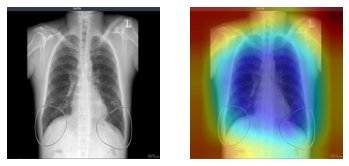

In [7]:
inference_path = 'C:/Users/ASUS/OneDrive/Desktop'
img_path = input('Feed me the existed image_path: ')

target_path = os.path.join(inference_path, img_path)

Model.inference(target_path)